In [1]:
import copy
import numpy as np
import networkx as nx
from networkx.generators.trees import NIL
import matplotlib.pyplot as plt
from random_word import RandomWords
from collections import defaultdict as ddict
from networkx.drawing.nx_agraph import write_dot, graphviz_layout


In [2]:
%matplotlib notebook

In [13]:
def hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, 
                  pos = None, parent = None):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
       G: the graph
       root: the root node of current branch
       width: horizontal space allocated for this branch - avoids overlap with other branches
       vert_gap: gap between levels of hierarchy
       vert_loc: vertical location of root
       xcenter: horizontal location of root
       pos: a dict saying where all nodes go if they have been assigned
       parent: parent of this branch.'''
    if pos == None:
        pos = {root:(xcenter,vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    neighbors = list(G.neighbors(root)) 
    if parent != None:   #this should be removed for directed graphs.
        neighbors.remove(parent)  #if directed, then parent not in neighbors.
    if len(neighbors)!=0:
        dx = width/len(neighbors) 
        nextx = xcenter - width/2 - dx/2
        for neighbor in neighbors:
            nextx += dx
            pos = hierarchy_pos(G,neighbor, width = dx, vert_gap = vert_gap, 
                                vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos, 
                                parent = root)
    return pos

In [14]:
pwd

'/home/gmarconi/coding/python/poincare-embeddings/notebooks'

<IPython.core.display.Javascript object>


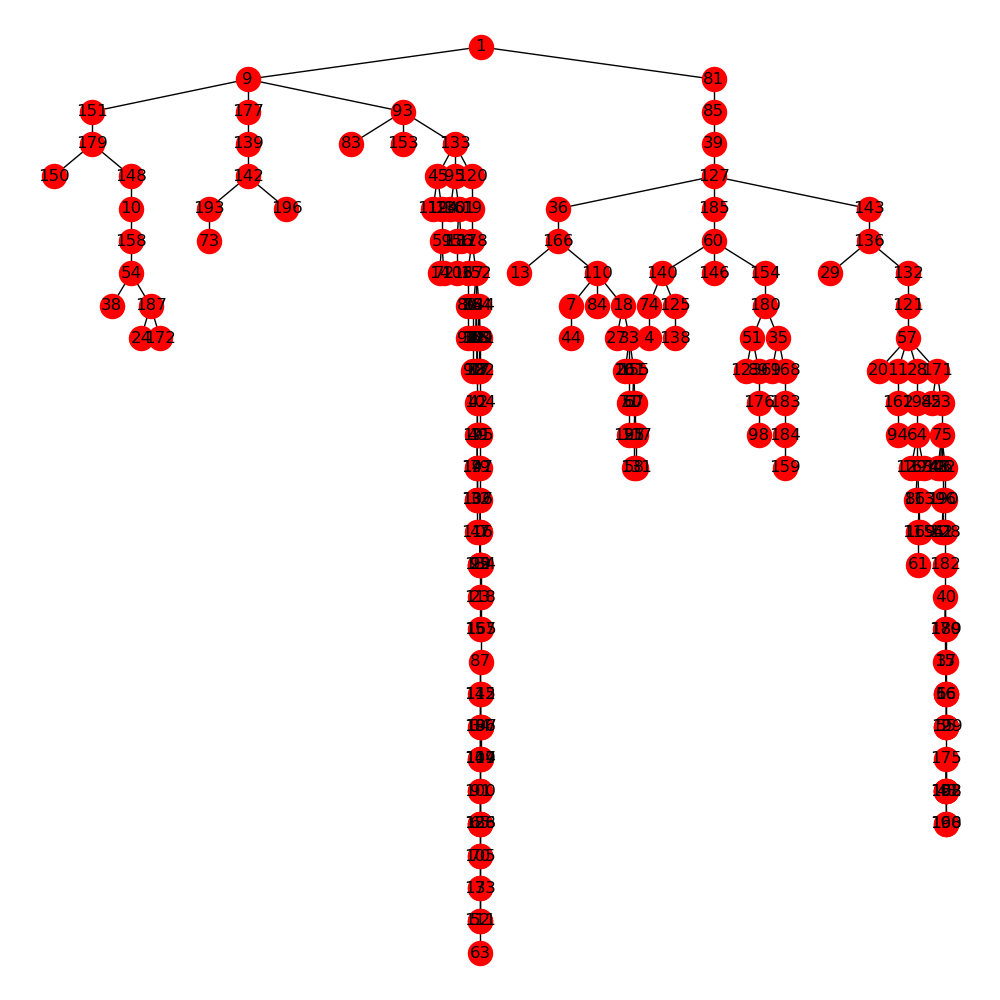

In [49]:
G = nx.random_tree(200, 13)
nodes  = [node[0] for node in G.adjacency()]
plt.figure(figsize=(10,10))
pos = hierarchy_pos(G,1)    
nx.draw(G, pos=pos, with_labels=True)

[[1, 9, 93, 133, 120, 19, 178, 152, 144, 68, 77, 104, 31, 79, 32, 0], [1, 81, 85, 39, 127, 143, 136, 132, 121, 57, 171, 53, 75, 8, 96, 128, 182, 40, 189, 37, 66, 2], [1, 9, 93, 133, 120, 19, 178, 152, 144, 68, 77, 104, 31, 79, 32, 0, 134, 23, 165, 87, 145, 186, 149, 91, 65, 70, 3], [1, 81, 85, 39, 127, 185, 60, 140, 74, 4], [1, 81, 85, 39, 127, 143, 136, 132, 121, 57, 171, 53, 75, 8, 96, 128, 182, 40, 189, 37, 66, 55, 175, 5], [1, 81, 85, 39, 127, 143, 136, 132, 121, 57, 171, 53, 75, 8, 96, 128, 182, 40, 189, 37, 66, 55, 175, 6], [1, 81, 85, 39, 127, 36, 166, 110, 7], [1, 81, 85, 39, 127, 143, 136, 132, 121, 57, 171, 53, 75, 8], [1, 9], [1, 9, 151, 179, 148, 10], [1, 81, 85, 39, 127, 143, 136, 132, 121, 57, 11], [1, 9, 93, 133, 120, 19, 178, 152, 144, 68, 77, 104, 31, 79, 32, 47, 12], [1, 81, 85, 39, 127, 36, 166, 13], [1, 9, 93, 133, 45, 124, 59, 14], [1, 81, 85, 39, 127, 143, 136, 132, 121, 57, 171, 53, 75, 8, 96, 128, 182, 40, 170, 15], [1, 81, 85, 39, 127, 143, 136, 132, 121, 57, 1

<IPython.core.display.Javascript object>


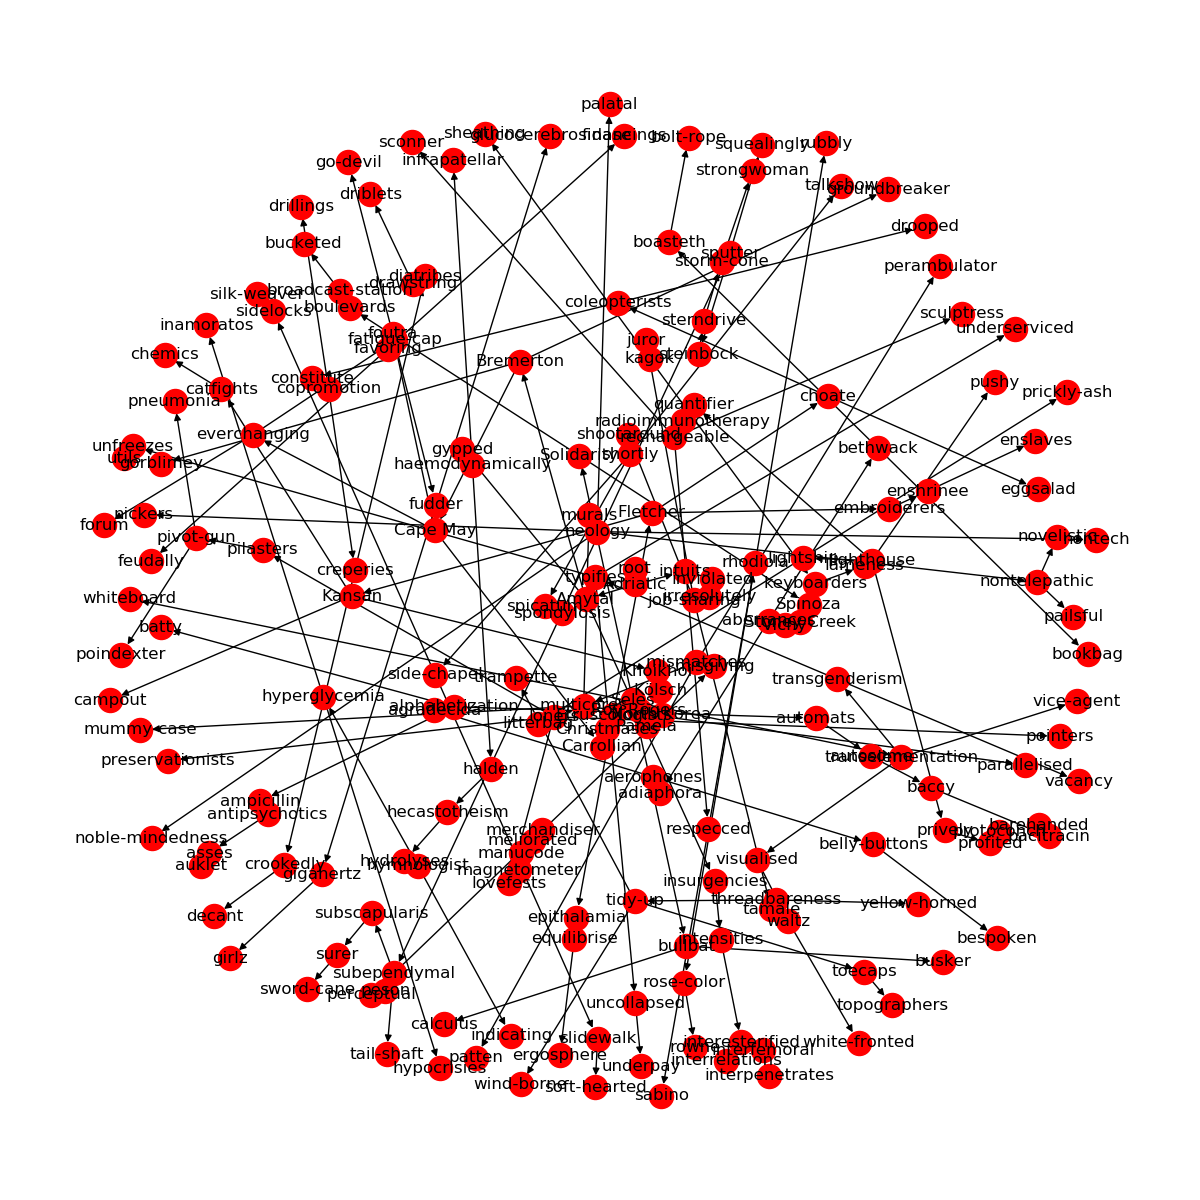

In [63]:
paths=[]
r = RandomWords()
words = r.get_random_words(limit=G.number_of_nodes())
for target in G.nodes:
    for path in nx.all_simple_paths(G, source=1, target=target):
        paths.append(path)
print(paths)
GD, root = nx.prefix_tree(paths)
GD.remove_node(NIL)
# names = ddict(r.get_random_word)
for idx, nodes in enumerate(GD.nodes):
    if nodes == root:
        continue
    names[nodes] = words[idx-1]
names[root] = 'root'
GD = nx.relabel_nodes(GD, names)
plt.figure(figsize=(12,12))
nx.draw(GD, with_labels=True)

In [60]:
len(words)

200

<IPython.core.display.Javascript object>


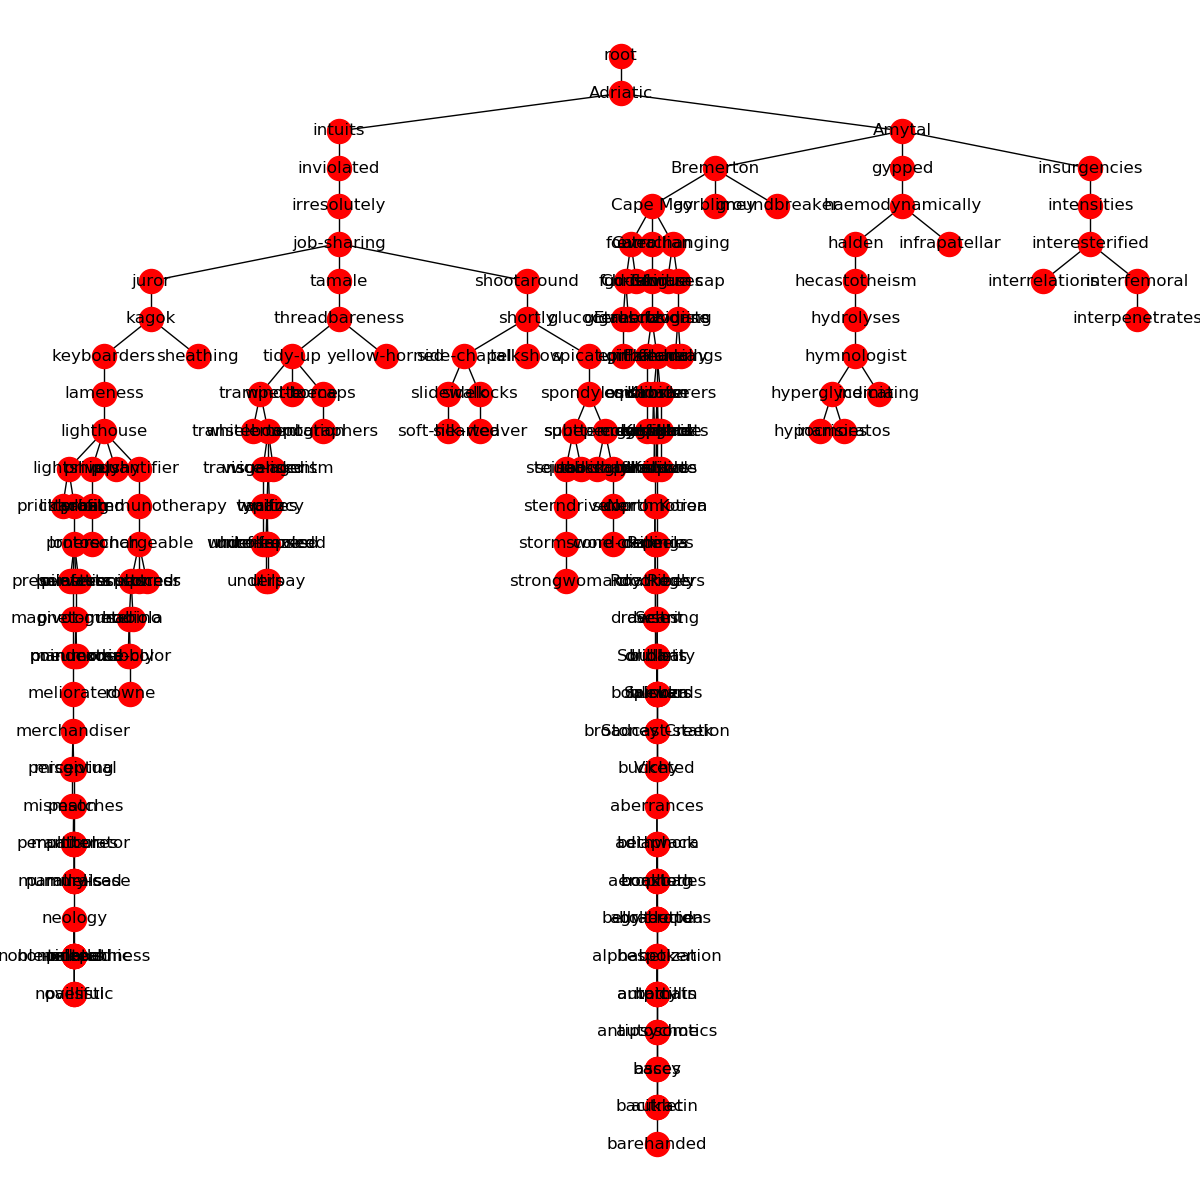

In [64]:
U = nx.to_undirected(GD)
nodes  = [node[0] for node in U.adjacency()]
plt.figure(figsize=(12,12))
pos = hierarchy_pos(U,'root')    
nx.draw(U, pos=pos, with_labels=True)

In [65]:
U = nx.transitive_closure(GD)
G = nx.to_undirected(U)


In [345]:
root = 'roor'
start_nnodes = G.number_of_nodes()
leaves_idx = G.number_of_nodes()
max_child = 10
dim = 300

X = []

for node in nodes:

    G.add_node(node, name=str(node), feature=-1)
    if len(G[node]) == 1 and (node != root):
        nchildren = np.random.randint(1, max_child+1)
        mean = np.zeros(dim)
        mean[min(dim-1, leaves_idx-start_nnodes)] = 10
        for child in range(nchildren):
            G.add_node(leaves_idx, name=str(node)+'_'+str(child), feature=(leaves_idx-start_nnodes))
            G.add_edge(node, leaves_idx)
            leaves_idx += 1
            feature = np.random.multivariate_normal(mean=mean, cov=np.eye(mean.size))
            X.append(feature)
        print("Added %d leaves to node %d" % (nchildren, node))
X = np.asarray(X)
print("\nAdded %d leaves" % (leaves_idx - start_nnodes))

Added 9 leaves to node 0
Added 8 leaves to node 2
Added 6 leaves to node 3
Added 1 leaves to node 14
Added 2 leaves to node 16
Added 6 leaves to node 20
Added 4 leaves to node 22
Added 7 leaves to node 25
Added 6 leaves to node 29
Added 4 leaves to node 32
Added 4 leaves to node 33
Added 3 leaves to node 34
Added 3 leaves to node 35
Added 2 leaves to node 42
Added 1 leaves to node 44
Added 7 leaves to node 45
Added 10 leaves to node 48
Added 2 leaves to node 49
Added 9 leaves to node 51
Added 2 leaves to node 52
Added 2 leaves to node 56
Added 10 leaves to node 60
Added 1 leaves to node 61
Added 4 leaves to node 66
Added 6 leaves to node 75
Added 8 leaves to node 76
Added 10 leaves to node 78
Added 6 leaves to node 82
Added 8 leaves to node 84
Added 2 leaves to node 85
Added 10 leaves to node 86
Added 10 leaves to node 88
Added 8 leaves to node 90
Added 1 leaves to node 92
Added 3 leaves to node 94
Added 10 leaves to node 95
Added 10 leaves to node 97
Added 2 leaves to node 98

Added 2

In [346]:
K = np.dot(X,X.T)
print(K.shape)
import seaborn as sns; sns.set()
ax = sns.heatmap(K)

(207, 207)


In [66]:
nx.write_weighted_edgelist(G, "../data/synth_simple_closure.tsv", delimiter='\t')
nx.write_gpickle(G, '../data/synth_simple_closure.p')
#np.save("synth_features.npy", X)